In [ ]:
# Last amended: 23th June, 2020
# My folder:
# Ref: Page 248, Aurelien Geron's book on Machine Learning
# Also see: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py
# Objectives:
#           i)  Using GMM as a generative model
#           ii) Generate digits
#           iii)Generate faces
#

In [1]:
%reset -f
# 1.0 Call libraries
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
# 1.1 Import GaussianMixture class
from sklearn.mixture import GaussianMixture
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
# 1.4
import time

In [5]:
# 1.5 Display multiple outputs from a cell
#     https://stackoverflow.com/a/42476224/3282777
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(1797, 64)

0

3

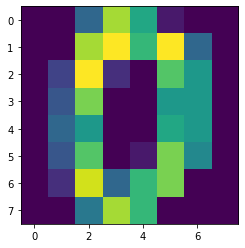

In [8]:
# 2.1 Get mnist-data
data, target = load_digits(return_X_y = True)
data.shape    # (1797,54)

# 2.2 See one image of a digit
imshow(data[0, :].reshape(8,8)) ;
target[0]b

In [ ]:
# 2.3 And one more image of a digit
imshow(data[3, :].reshape(8,8)) ;
target[3]

(400, 4096)

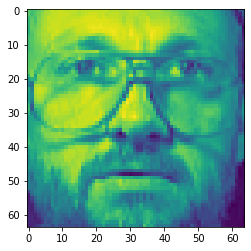

In [9]:
# 2.4 Also, get olivetti faces data
# Data downloaded to /home/ashok/scikit_learn_data
faces,_ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
faces.shape    # (400, 4096)
# 2.4.1 Look at just one face
imshow(faces[0, :].reshape(64,64))

In [ ]:
##########################################
#     Gaussian Mixture Modeling         ##
##########################################

In [10]:

# 4.1 Instantiate GMM classes
# 4.1.1 for digits
gm_digits = GaussianMixture(
                           n_components = 10,   # For digits,0 to 9
                           n_init = 10,
                           max_iter = 100
                         )

# 4.1.2 for faces
gm_faces = GaussianMixture(
                           n_components = 3,   # More the clusters, more the time
                           n_init = 10,
                           max_iter = 100
                         )

In [11]:
# 4.2 Train the algorithm
# 4.2.1 Ist on mnist data
#       Takes less time
gm_digits.fit(data)

# 4.2.2 Also, on faces data
#       This takes time
start = time.time()
gm_faces.fit(faces)
end = time.time()
(end - start)/60     # 4 minutes

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

2.961503040790558

In [12]:
# 4.3 Did algorithm(s) converge?
gm_digits.converged_    # True
gm_faces.converged_     # True

True

True

In [13]:
# 4.4 How many iterations did they perform?
gm_digits.n_iter_     # 18 (or more)
gm_faces.n_iter_      #  2

41

2

In [14]:
# 4.5 Clusters labels (mnist data only)
gm_digits.predict(data)
target          # May compare with originals
# 4.6 Create a dataframe for easy comparisions
#     Not a good match. Maybe we need to play with
#     GMM parameters
df = pd.DataFrame()
df['target'] = target
df['cluster'] = gm_digits.predict(data)
df.head(20)

array([4, 1, 1, ..., 1, 1, 3])

array([0, 1, 2, ..., 8, 9, 8])

,target,cluster
0,0,4
1,1,1
2,2,1
3,3,1
4,4,0
5,5,1
6,6,3
7,7,6
8,8,1
9,9,2


In [15]:
# 4.7 Predict allocation of faces to clusters
gm_faces.predict(faces)

array([2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2,
       2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1,

2

(20, 64)

(20, 64)

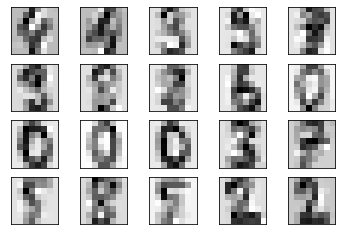

In [34]:
# 4.8 GMM is a generative model.
#     Generate 20 samples from each cluster

# 4.8.1 Ist for mnist digits
gen_digits = gm_digits.sample(n_samples = 20)  # generate 20 samples
len(gen_digits)        # tuple with 2-elements
gen_digits[0].shape    # (20,64)
im = gen_digits[0]
im.shape               # (20,64)

# 5.0 Plot all 20 generated digits
for i in range(20):
    ax = plt.subplot(4,5,i+1)
    _ = plt.imshow(im[i].reshape(8,8), cmap=plt.cm.gray_r,interpolation='nearest')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [18]:
# 6.0 For faces. Generate 20 new faces
#     Takes time
start = time.time()
gen_faces = gm_faces.sample(n_samples = 20)
end = time.time()
(end- start)/60     # 3 minutes

1.26694096326828

In [19]:
# 6.1 What do we get
len(gen_faces)    # tuple with 2-objects
gen_faces[0].shape   # (20, 4096)

2

(20, 4096)

(20, 4096)

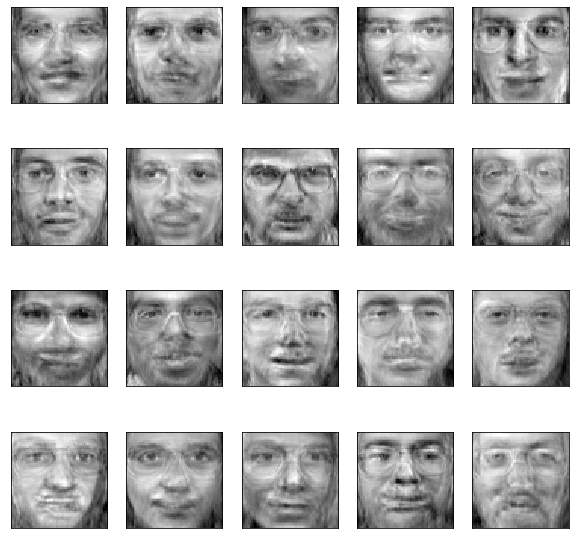

In [40]:
# 6.2 Plot all 20 generated faces
im = gen_faces[0]
im.shape    # (20, 4096)

fig = plt.figure(figsize = (10,10))
for i in range(20):
    ax=plt.subplot(4,5,i+1)
    abc = plt.imshow(im[i].reshape(64,64),cmap=plt.cm.gray)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

In [ ]:
########### Done ##############